# BUSINESS UNDERSTANDING

Customer Churn is a major challange for businesses. In the Telecommunication industry, it occurs when customers switch to different providers due to pricing, service quality, or even competitive offers.

My aim is to understand the patterns of these customers who churn and also build a model that will predict whether a customer will 'soon' stop doing business with SyriaTel Telecommunications.

The stakeholders for my project are different departments in SyriaTel. These include the Executive Office, the Customer Relations and Support department and the Marketing Department.


**OBJECTIVES**

1. Identify the factors that contribute to customer churn.
2. Build a model to predict customer churn.

# DATA UNDERSTANDING 

We will be working with a dataset from Kaggle(https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/code). The data is contained in `Customer_Churn_Data.csv` and each record represents a customer, and the columns are the attributes of the customers, ranging from their phone number, state, number of customer service calls they have made, whether they have left or are still a customer, among other attributes.


Here's a summary of the columns:

* state:  The state of the customer.

* account length:  The length of the account in days or months.

* area code:  The area code of the customer's phone number.

* phone number:  The phone number of the customer.

* international plan:  Whether the customer has an international plan or not.

* voice mail plan:  Whether the customer has a voicemail plan or not.

* number vmail messages:  The number of voicemail messages the customer has.

* total day minutes:  Total minutes of day calls.

* total day calls:  Total number of day calls.

* total day charge:  Total charge for the day calls.

* total eve minutes:  Total minutes of evening calls.

* total eve calls:  Total number of evening calls.

* total eve charge:  Total charge for the evening calls.

* total night minutes:  Total minutes of night calls.

* total night calls:  Total number of night calls.

* total night charge:  Total charge for the night calls.

* total intl minutes:  Total minutes of international calls.

* total intl calls:  Total number of international calls.

* total intl charge:  Total charge for the international calls.

* customer service calls:  Number of times the customer called customer service.

* churn:  Whether the customer churned or not (True/False).

### LOADING AND DISPLAYING THE DATASET

In [1]:
import pandas as pd

df = pd.read_csv("Data/Customer_Churn_Data.csv")
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [2]:
# Rename the column names
df.columns = df.columns.str.replace(" ", "_")
print(df.columns)

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')


### EXPLORATORY DATA ANALYSIS

In [3]:
# Check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

* We have object, integer, float and boolean data types. For modelling purposes, I will convert and transform relevant columns.


* There are no misssing values in the columns as seen above.

In [4]:
# Check descriptive statistics
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Univariate Analysis

This analysis is for exploring the distribution of some features for a better understanding.

**1. The target variable `'churn'`**

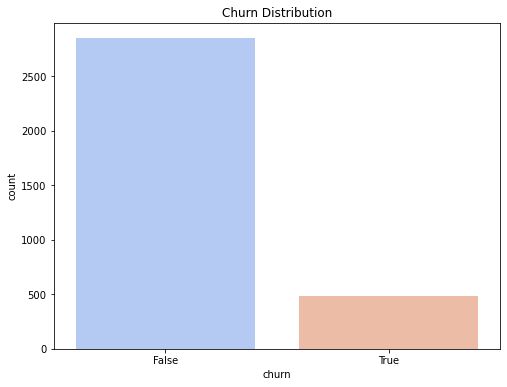

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.countplot(x='churn', data=df, palette='coolwarm')
plt.title("Churn Distribution")
plt.show()

* Most customers fall under the `False` category. Those who churn range between 500-600 while those who dont are well over 2,500.

********************

**2. Which states have more customers?**

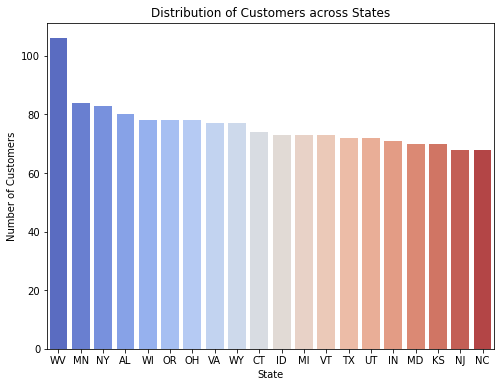

In [6]:
state = df['state'].value_counts().head(20)

plt.figure(figsize=(8,6))
sns.barplot(x=state.index, y=state.values, palette='coolwarm')
plt.title('Distribution of Customers across States')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.show()

* The above plot shows the distribution of customers across the top 20 states with the most customers.

* West Virginia (WV) has the highest number of customers, followed by Minnesota (MN) then New York (NY). West Virginia has a significantlly higher number of customers compared to the other states.

***********************


## Bivariate

Let's now explore the relationship between some features and the target to look out for patterns and insights.

**1. International plan and Churn**

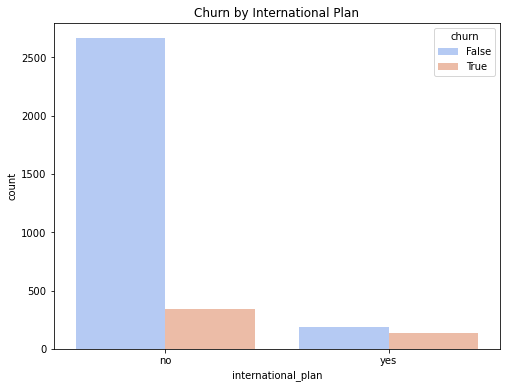

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(x="international_plan", hue="churn", data=df, palette="coolwarm")
plt.title("Churn by International Plan")
plt.show()

**FINDINGS**

* Customers with no international plan and are retained as customers are the most.

* Those who have an international plan and churn are less than those who dont churn but still have an internatonal plan.

* This shows that having an internationl plan is not a factor causing churning.

**2. Voice Mail Plan and Churn**

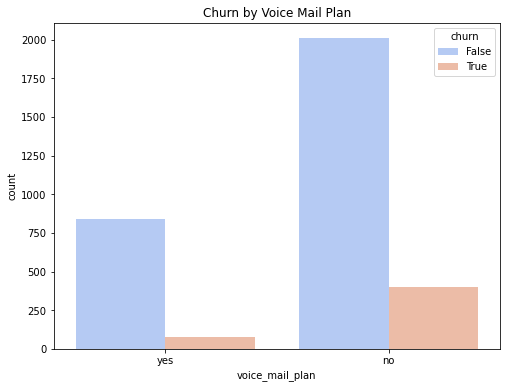

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x="voice_mail_plan", hue="churn", data=df, palette="coolwarm")
plt.title("Churn by Voice Mail Plan")
plt.show()

**FINDINGS**

* Same as with the international plan, most customers who are retained do not have a voice mail plan.

* For those with a voice mail plan, those who churn are still less than those who dont. This also shows that having a voicemail plan is really not a factor causing churning.

**3. Charges and Churn**

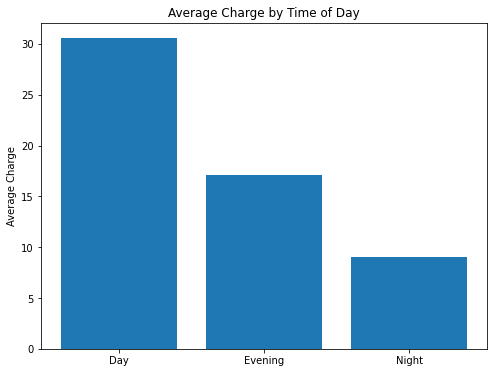

In [9]:
day = df['total_day_charge'].mean()
eve = df['total_eve_charge'].mean()
night = df['total_night_charge'].mean()

plt.figure(figsize=(8,6))
plt.bar(['Day', 'Evening', 'Night'], [day, eve, night])
plt.ylabel('Average Charge')
plt.title('Average Charge by Time of Day')
plt.show()

**FINDINGS**

* Charges are significantlly higher during the day compared to the evening and the night time. It is cheaper to use this service at night.

**4. Total Day Minutes and Churn**

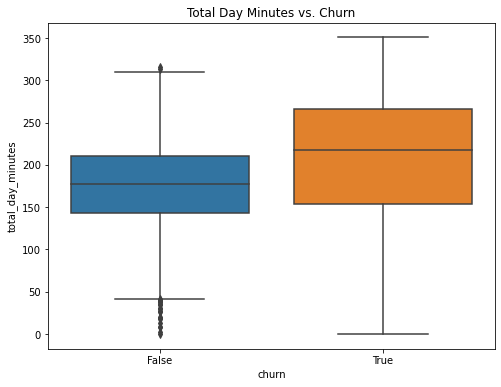

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x="churn", y="total_day_minutes", data=df)
plt.title("Total Day Minutes vs. Churn")
plt.show()

**FINDINGS**

* Higher churn rates are involved with customers who have a lot of daily minutes. Majority of those who are retained have about 140 - 210 day minutes while majority of those who churn have 150 - 260 day minutes.



**5. Total Night Minutes and Churn**

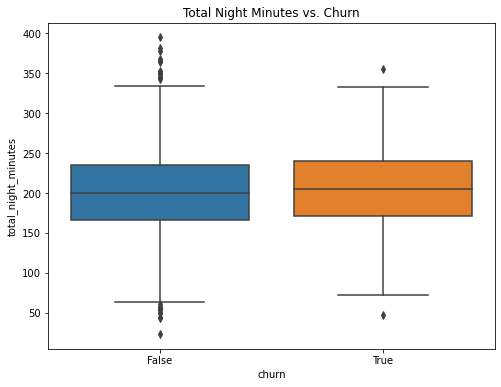

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x="churn", y="total_night_minutes", data=df)
plt.title("Total Night Minutes vs. Churn")
plt.show()

**FINDINGS**

* Majority of the customers who churn have almost the same night minutes as majority of those who are retained.

* Comparing the churn rates at night and during the day using minutes, it is evident that most customers who churn have a lot of daily minutes, and therefore are the most expensed since charges are higher during the day.



**6. Customer Service Calls and Churn**

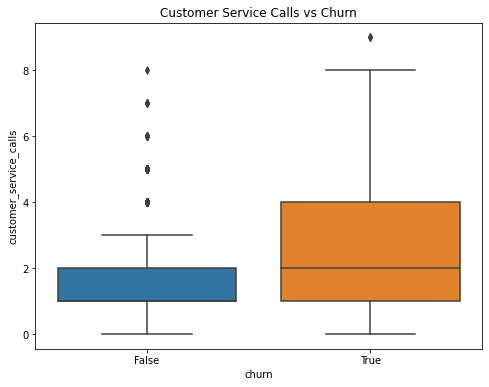

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x="churn", y="customer_service_calls", data=df)
plt.title("Customer Service Calls vs Churn")
plt.show()

**FINDINGS**

* Most customers who call customer service have churned compared to those who haven't churned.

## Multivariate

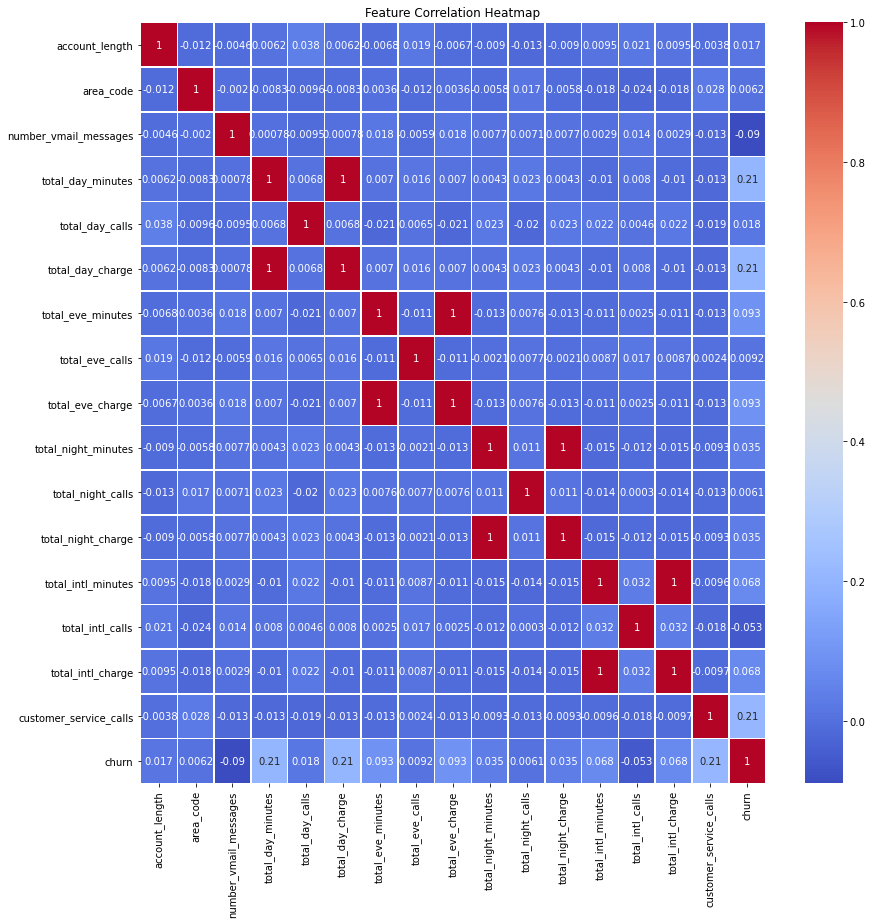

In [13]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

* This plot shows the relationships between all the numeric features in the dataset.

* There is perfect correlation between the following features:

           1. Total Day minutes and Total Day Charge
                
           2. Total Evening Minutes and Total Evening Charge
                
           3. Total Night Minutes and Total Night Charge
                
           4. Total International Minutes and Total International Charge 
              


### OVERALL FINDINGS AND RECOMMENDATIONS

**FINDINGS**

1. International plans and voicemail plans dont play a significant role in the customer churn rate.

2. High daily charges and poor customer service are leading to high customer churn rates.

**RECOMMENDATIONS**

1. Reduce the daily charges to be able to retain customers. The marketing team should come up with campaigns that will inform customers when this happens.

2. Train the Customer Relations and Support department on client management.


# DATA PREPARATION


In [14]:
# Define X and y
y = df[['churn']]
X = df.drop(['churn','phone_number'], axis=1)

## Split the data

Data preparation should happen after the data has been split to avoid data leakage.
Data leakage will lead to overly optimistic perfomance metrics during model validation since the model may have had access to information before the split.

In [15]:
# Splitting the data using train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
2016,RI,80,510,no,no,0,202.4,118,34.41,260.2,67,22.12,177.4,112,7.98,9.2,5,2.48,3
1362,WV,63,510,no,no,0,132.9,122,22.59,67.0,62,5.70,160.4,121,7.22,9.9,2,2.67,3
2670,WY,116,510,no,yes,12,221.0,108,37.57,151.0,118,12.84,179.0,80,8.06,9.0,6,2.43,2
2210,UT,71,415,no,no,0,278.9,110,47.41,190.2,67,16.17,255.2,84,11.48,11.7,7,3.16,0
1846,NH,120,510,no,yes,43,177.9,117,30.24,175.1,70,14.88,161.3,117,7.26,11.5,4,3.11,1


In [17]:
X_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
438,WY,113,510,no,no,0,155.0,93,26.35,330.6,106,28.10,189.4,123,8.52,13.5,3,3.65,1
2674,IL,67,415,no,no,0,109.1,117,18.55,217.4,124,18.48,188.4,141,8.48,12.8,6,3.46,0
1345,SD,98,415,no,no,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4
1957,KY,147,408,no,no,0,212.8,79,36.18,204.1,91,17.35,156.2,113,7.03,10.2,2,2.75,1
2148,WY,96,408,no,no,0,144.0,102,24.48,224.7,73,19.10,227.7,91,10.25,10.0,7,2.70,1


### OneHotEncode categorical features

In [18]:
from sklearn.preprocessing import OneHotEncoder

# Define categorical columns
cat_columns = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

# instantiate OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform training data then convert to a dataframe
X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train[cat_columns]), 
                           columns=ohe.get_feature_names_out(cat_columns), 
                           index=X_train.index)

# Transform Test set
X_test_ohe = pd.DataFrame(ohe.transform(X_test[cat_columns]),
                           index=X_test.index,
                           columns=ohe.get_feature_names_out(cat_columns))

# Drop original categorical columns from X_train and X_test
X_train = X_train.drop(columns=cat_columns)
X_test = X_test.drop(columns=cat_columns)

# Concatenate one-hot encoded features back
X_train = pd.concat([X_train, X_train_ohe], axis=1)
X_test = pd.concat([X_test, X_test_ohe], axis=1)

X_test = X_test[X_train.columns]

In [19]:
X_train.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510,international_plan_yes,voice_mail_plan_yes
2016,80,0,202.4,118,34.41,260.2,67,22.12,177.4,112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1362,63,0,132.9,122,22.59,67.0,62,5.70,160.4,121,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2670,116,12,221.0,108,37.57,151.0,118,12.84,179.0,80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2210,71,0,278.9,110,47.41,190.2,67,16.17,255.2,84,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1846,120,43,177.9,117,30.24,175.1,70,14.88,161.3,117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [20]:
X_test.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_415,area_code_510,international_plan_yes,voice_mail_plan_yes
438,113,0,155.0,93,26.35,330.6,106,28.10,189.4,123,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2674,67,0,109.1,117,18.55,217.4,124,18.48,188.4,141,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1345,98,0,0.0,0,0.00,159.6,130,13.57,167.1,88,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1957,147,0,212.8,79,36.18,204.1,91,17.35,156.2,113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2148,96,0,144.0,102,24.48,224.7,73,19.10,227.7,91,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Standardize Numeric Features

In [21]:
# Instantiate the scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_numeric= X_train.copy()

# Filter to remain with relevant columns
numeric_cols = df.select_dtypes('number')
numeric_cols = numeric_cols.drop('area_code', axis=1)

X_train_numeric = X_train_numeric[numeric_cols.columns] # a subset of X_train, untransformed

# Standardize the training set
X_train_standardized = pd.DataFrame(scaler.fit_transform(X_train_numeric),
                                   columns=X_train_numeric.columns,
                                   index=X_train_numeric.index)
X_train_standardized.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
2016,-0.511937,-0.585483,0.410716,0.873749,0.410877,1.167102,-1.646317,1.167733,-0.456961,0.615443,-0.458282,-0.373682,0.226639,-0.379643,1.073319
1362,-0.939002,-0.585483,-0.864713,1.074874,-0.865095,-2.639021,-1.895351,-2.637901,-0.790790,1.075039,-0.789925,-0.122835,-0.997316,-0.127479,1.073319
2670,0.392435,0.289180,0.752053,0.370935,0.752000,-0.984185,0.893834,-0.983076,-0.425542,-1.018675,-0.423373,-0.445353,0.634624,-0.446002,0.323378
2210,-0.738030,-0.585483,1.814605,0.471498,1.814230,-0.211928,-1.646317,-0.211288,1.070799,-0.814411,1.069020,0.522200,1.042609,0.522840,-1.176504
1846,0.492921,2.548723,-0.038896,0.823467,-0.039276,-0.509404,-1.496896,-0.510269,-0.773117,0.870774,-0.772470,0.450529,-0.181346,0.456481,-0.426563


In [22]:
# Transform the test set
X_test_standardized = pd.DataFrame(scaler.transform(X_test[numeric_cols.columns]),
                                   columns=X_test[numeric_cols.columns].columns,
                                   index=X_test[numeric_cols.columns].index)
X_test_standardized.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
438,0.317071,-0.585483,-0.459145,-0.383285,-0.459202,2.554012,0.296151,2.553707,-0.221317,1.177171,-0.222641,1.167234,-0.589331,1.173159,-0.426563
2674,-0.838516,-0.585483,-1.301479,0.823467,-1.301214,0.323924,1.192675,0.324097,-0.240954,2.096363,-0.240096,0.916387,0.634624,0.920994,-1.176504
1345,-0.059751,-0.585483,-3.303627,-5.059450,-3.303691,-0.814761,1.491516,-0.813885,-0.659222,-0.610146,-0.659013,-1.233728,-1.405302,-1.229039,1.823260
1957,1.171201,-0.585483,0.601571,-1.087224,0.601949,0.061908,-0.450952,0.062199,-0.873266,0.666509,-0.872836,-0.015329,-0.997316,-0.021304,-0.426563
2148,-0.109994,-0.585483,-0.661012,0.069247,-0.661069,0.467737,-1.347475,0.467793,0.530781,-0.456947,0.532282,-0.087000,1.042609,-0.087663,-0.426563


### Combining the datasets into one

In [23]:
# Drop non-transformed columns
cols_to_drop = cat_columns + numeric_cols.columns.tolist()
X_train_filtered = X_train.drop(columns=cols_to_drop, errors='ignore')

# Bring them together
X_train_tr = pd.concat([X_train_filtered, X_train_ohe, X_train_standardized], axis=1)
X_train_tr.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.167102,-1.646317,1.167733,-0.456961,0.615443,-0.458282,-0.373682,0.226639,-0.379643,1.073319
1362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.639021,-1.895351,-2.637901,-0.790790,1.075039,-0.789925,-0.122835,-0.997316,-0.127479,1.073319
2670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.984185,0.893834,-0.983076,-0.425542,-1.018675,-0.423373,-0.445353,0.634624,-0.446002,0.323378
2210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.211928,-1.646317,-0.211288,1.070799,-0.814411,1.069020,0.522200,1.042609,0.522840,-1.176504
1846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.509404,-1.496896,-0.510269,-0.773117,0.870774,-0.772470,0.450529,-0.181346,0.456481,-0.426563


In [24]:
X_train_tr.head(10)

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.167102,-1.646317,1.167733,-0.456961,0.615443,-0.458282,-0.373682,0.226639,-0.379643,1.073319
1362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.639021,-1.895351,-2.637901,-0.790790,1.075039,-0.789925,-0.122835,-0.997316,-0.127479,1.073319
2670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.984185,0.893834,-0.983076,-0.425542,-1.018675,-0.423373,-0.445353,0.634624,-0.446002,0.323378
2210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.211928,-1.646317,-0.211288,1.070799,-0.814411,1.069020,0.522200,1.042609,0.522840,-1.176504
1846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.509404,-1.496896,-0.510269,-0.773117,0.870774,-0.772470,0.450529,-0.181346,0.456481,-0.426563
2071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.234866,0.445572,2.233867,0.903885,-0.967609,0.903199,-2.165445,1.858580,-2.171337,0.323378
3018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.196949,1.690744,-1.196302,0.524890,0.564377,0.523555,0.701376,-0.997316,0.695373,0.323378
3269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.956308,0.196538,0.956824,-0.743662,0.768641,-0.741924,0.092176,0.226639,0.098142,-0.426563
2584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.197841,0.744413,0.198942,-0.409832,0.819708,-0.410281,0.414694,0.226639,0.416665,1.073319
2561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.286789,0.694606,-0.287771,0.183206,0.564377,0.183185,-0.911211,0.634624,-0.910516,-0.426563


In [25]:
X_train_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 2016 to 3174
Columns: 123 entries, state_AL to customer_service_calls
dtypes: float64(123)
memory usage: 2.2 MB


The `'phone_number'` column seems to be a unique identifier for the customers so I am chooseing to drop it.

### Combining Test set into one.

In [26]:
# Drop non-transformed columns
cols_to_drop = cat_columns + numeric_cols.columns.tolist()
X_test_filtered = X_test.drop(columns=cols_to_drop, errors='ignore')

# Bring them together
X_test_tr = pd.concat([X_test_filtered, X_test_ohe, X_test_standardized], axis=1)
X_test_tr.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.554012,0.296151,2.553707,-0.221317,1.177171,-0.222641,1.167234,-0.589331,1.173159,-0.426563
2674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.323924,1.192675,0.324097,-0.240954,2.096363,-0.240096,0.916387,0.634624,0.920994,-1.176504
1345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.814761,1.491516,-0.813885,-0.659222,-0.610146,-0.659013,-1.233728,-1.405302,-1.229039,1.823260
1957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.061908,-0.450952,0.062199,-0.873266,0.666509,-0.872836,-0.015329,-0.997316,-0.021304,-0.426563
2148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.467737,-1.347475,0.467793,0.530781,-0.456947,0.532282,-0.087000,1.042609,-0.087663,-0.426563


# MODELLING

## 1. Baseline Model

Let's build a regression model, which will help classify whether a customer will leave, `True` or not, `False`

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
baseline_model = logreg.fit(X_train_tr, y_train)
baseline_model

C:\Users\sharo\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

### Model Evaluation

In [28]:
y_pred_train = baseline_model.predict(X_train_tr)
y_pred_test = baseline_model.predict(X_test_tr)

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Training Set Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Set Accuracy:", accuracy_score(y_test, y_pred_test))
print()
print("Training Set Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("Testing Set Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print()
print("Training Set Classification Report:\n", classification_report(y_train, y_pred_train))
print("Testing Set Classification Report:\n", classification_report(y_test, y_pred_test))

Training Set Accuracy: 0.8718388341191599
Testing Set Accuracy: 0.858

Training Set Confusion Matrix:
 [[1932   61]
 [ 238  102]]
Testing Set Confusion Matrix:
 [[826  31]
 [111  32]]

Training Set Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.97      0.93      1993
        True       0.63      0.30      0.41       340

    accuracy                           0.87      2333
   macro avg       0.76      0.63      0.67      2333
weighted avg       0.85      0.87      0.85      2333

Testing Set Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92       857
        True       0.51      0.22      0.31       143

    accuracy                           0.86      1000
   macro avg       0.69      0.59      0.62      1000
weighted avg       0.83      0.86      0.83      1000



### Interpretation

**1. ACCURACY SCORE**

Training Set Accuracy: 0.872

Testing Set Accuracy: 0.858


The accuracy score for the training test is 87.2% while that for the test set is 85.8%. There is a slight difference meaning the model generalizes well and there is no overfitting.

**2. CONFUSION MATRIX**

`Training Set Confusion Matrix:`

                              [[1932   61]

                              [ 238  102]]
 
* True Negatives(TN) = 1932
The model correctly predicted **1932** negative cases.


* False Positives(FP) = 61 
The model predicted **61** cases as positive, when infact they are negative.


* False Negatives(FN) = 238 
The model has predicted **238** cases as negative when they are actually positive


* True Positives(TN) = 102
The model has correctly predicted **102** positive cases.
 
 
 `Testing Set Confusion Matrix:`
 
                               [[826  31]
                               
                               [111  32]]
                               
* True Negatives(TN) = 826
The model correctly predicted **826** negative cases.


* False Positives(FP) = 31 
The model predicted **31** cases as positive, when infact they are negative.


* False Negatives(FN) = 111 
The model has predicted **111** cases as negative when they are actually positive


* True Positives(TN) = 32
The model has correctly predicted **32** positive cases.

**************************
From both the training and testing confusion matrices, it is evident that the model is better at predicting False, that a customer wont leave than at predicting True, that's when they will leave.

The False negatives are high for both sets and this is an issue since the model is classifying customers that will leave as customers that will stay.

**3.RECALL, PRECISION AND F1-SCORE**

`Training Set Classification Report:`

               precision    recall  f1-score

       False       0.89      0.97      0.93     
        True       0.63      0.30      0.41      



`Testing Set Classification Report:`

               precision    recall  f1-score   

       False       0.88      0.96      0.92       
        True       0.51      0.22      0.31       

**TEST INTERPRETATION**
* The precision for `False` predictions is at  88% meaning that the model is predicting a high percentage of false cases correctly.


* For recall, the true positive rate, the model is failing to identify many positive instances, evidenced by the low value of 22%.

* An F1-score of 31% for the `True` class show that the model is not mininmizing the false negatives and false positives efficiently as this is a low percentage compared to 92% for the False class. 

*******************************
From the above analysis, it is evident that the dataset is imbalnced as we have more negatives than positives.

## 2. Random Forest 

We will now build a Random Forest classifier since Logistic regression is producing imbalanced classes.

The parameters i will include in the model are:
        `class_weight='balanced'` to deal with the class imbalance,
        `n_estimators=100` which is the number of decision trees in the forest and
        `random_state=42` which ensures reproducibility

In [29]:
# Import necessary libraries 
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train_tr, y_train)

C:\Users\sharo\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

### Model Evaluation

In [30]:
# Make predictions
y_train_pred_rf = rf_model.predict(X_train_tr)
y_test_pred_rf = rf_model.predict(X_test_tr)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print()
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_rf))
print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))
print()
print("Classification Report:\n", classification_report(y_train, y_train_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_test_pred_rf))

Training Accuracy: 1.0
Testing Accuracy: 0.931

Training Confusion Matrix:
 [[1993    0]
 [   0  340]]
Testing Confusion Matrix:
 [[855   2]
 [ 67  76]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1993
        True       1.00      1.00      1.00       340

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333

Classification Report:
               precision    recall  f1-score   support

       False       0.93      1.00      0.96       857
        True       0.97      0.53      0.69       143

    accuracy                           0.93      1000
   macro avg       0.95      0.76      0.82      1000
weighted avg       0.93      0.93      0.92      1000



## Interpretation

**1. ACCURACY**

* The 100% accuracy score on the training data suggests overfitting.

* In comparison to the accuracy score from the baseline model, this model generalizes better to unseen data  since it has a higher score, of 93.1%

**2. CONFUSION MATRIX**

`Training Set Confusion Matrix:`

                         [[1993    0]
 
                         [   0  340]]
                     
* There are **1993** True Negatives and **340** True Positives, which is all the data we have. This shows that the model is overfitting. 


`Testing Set Confusion Matrix:`

                         [[855   2]
                     
                         [ 67  76]]

* True Negatives(TN)

  The model correctly predicted **855** negative cases.


* False Positives(FP)

  The model predicted **2** cases as positive, when infact they are negative.


* False Negatives(FN)  

  The model has predicted **67** cases as negative when they are actually positive


* True Positives(TN)

  The model has correctly predicted **76** positive cases.

**********

In comparison to the baseline model, this model has reduced the number of false positive cases to 2 from 31, meaning the prediction of customers who leave but its reported they are still customers has reduced. This is good.

We still have 67 cases of customers who leave being reported as staying. It has reduced compared to the baseline model, but is stll a worry-some number. The goal is to minimize it.

**3.RECALL, PRECISION AND F1-SCORE**

`Training Set Classification Report:`

               precision    recall  f1-score

       False       1.00      1.00      1.00     
        True       1.00      1.00      1.00      

* The model is overfitting on the training set as all scores are 1.00

`Testing Set Classification Report:`

               precision    recall  f1-score   

       False       0.93      1.00      0.96       
        True       0.97      0.53      0.69

* In the testing set, the precision and recall for the True class have improved in comparison to the baseline model.

The recall for the true class is at 53%, but it could be better.

## Hyperparameter Tuning

Since the model is overfitting on the training data, we will hypertune the parameters to reduce it.

We will use `GridSearchCV` to find the best parameters.

In [31]:
# Import libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': ['balanced'] 
}

# Use GridSearchCV for tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='recall', n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train_tr, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\sharo\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


### Model Evaluation

Now to train the model with the best parameters then evaluate its perfomance.

In [32]:
# Training the best model
best_rf = grid_search.best_estimator_

# Make predictions
y_train_pred_best = best_rf.predict(X_train_tr)
y_test_pred_best = best_rf.predict(X_test_tr)

# Evaluate Performance
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_best))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_best))
print()
print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_best))
print()
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred_best))

Training Accuracy: 0.9507072438919846
Testing Accuracy: 0.938

Testing Confusion Matrix:
 [[822  35]
 [ 27 116]]

Testing Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.96      0.96       857
        True       0.77      0.81      0.79       143

    accuracy                           0.94      1000
   macro avg       0.87      0.89      0.88      1000
weighted avg       0.94      0.94      0.94      1000



## Interpretation
**1. ACCURACY**

* The overfitting in the train model has reduced. This is because the score has reduced from 100% to 95.1%.

* The Test accuracy of 93.8% is better compared to the baseline logistic regression 85.8% and untuned Random Forest of 93.1%. This model generalizes better compared to the other twomodels.

**2. CONFUSION MATRIX**

`Testing Set Confusion Matrix:`

                         [[822   35]
                     
                         [ 27  116]]

* True Negatives(TN) = 822
The model has correctly predicted **822** negative cases.


* False Positives(FP) = 32 
The model has predicted **32** cases as positive, when infact they are negative.


* False Negatives(FN) = 27 
The model has predicted **27** cases as negative when they are actually positive


* True Positives(TN) = 116
The model has correctly predicted **116** positive cases.


Initially the model predicted 67 False Negatives, and i was aiming to reduce this number so that the number of customers who leave but are reported as still customers reduces.

The number of True Positives has also increased, from 76 to 116, implying the True Positive Rate(TPR) has improved.


**3.RECALL, PRECISION AND F1-SCORE**

`Testing Set Classification Report:`

               precision    recall  f1-score   

       False       0.97      0.96      0.96       
        True       0.77      0.81      0.79
        
        
 * This model detects the True class much better than the untuned model, and this is evident from the recall score which has increased to 81% from 53%. 

 ## 3. Decision Tree 

In [34]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
dt_model.fit(X_train_tr, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## Model Evaluation

In [35]:
# Make predictions
y_train_pred_dt = dt_model.predict(X_train_tr)
y_test_pred_dt = dt_model.predict(X_test_tr)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_dt))
print()
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_dt))
print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_dt))
print()
print("Training Set Classification Report:\n", classification_report(y_train, y_train_pred_dt))
print("Testing Set Classification Report:\n", classification_report(y_test, y_test_pred_dt))

Training Accuracy: 1.0
Testing Accuracy: 0.908

Training Confusion Matrix:
 [[1993    0]
 [   0  340]]
Testing Confusion Matrix:
 [[808  49]
 [ 43 100]]

Training Set Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1993
        True       1.00      1.00      1.00       340

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333

Testing Set Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.94      0.95       857
        True       0.67      0.70      0.68       143

    accuracy                           0.91      1000
   macro avg       0.81      0.82      0.82      1000
weighted avg       0.91      0.91      0.91      1000



### Interpretation

**1. ACCURACY SCORE**

Training Set Accuracy: 1.00

Testing Set Accuracy: 0.91


The accuracy score for the training test is 100% while that for the test set is 91%. The 100% shows that there is overfitting since the model perfectly predicts the training data.

**2. CONFUSION MATRIX**

`Training Set Confusion Matrix:`

                              [[1933   0]

                              [ 0    340]]


* There are 1993 True Negatives and 340 True Positives, which is all the data we have. This shows that the model is overfitting.
 
 
 `Testing Set Confusion Matrix:`
 
                               [[808  49]
                               
                               [43   100]]
                               
* True Negatives(TN) = 808
The model correctly predicted **808** negative cases.


* False Positives(FP) = 49 
The model predicted **49** cases as positive, when infact they are negative.


* False Negatives(FN) = 43 
The model has predicted **43** cases as negative when they are actually positive


* True Positives(TN) = 100
The model has correctly predicted **100** positive cases.

**************************
This model is missing 43 customers that churn (False Negatives) and is predicting that 49 retained customers churn (False Positives).


**3.RECALL, PRECISION AND F1-SCORE**

`Training Set Classification Report:`

               precision    recall  f1-score

       False       1.00      1.00      1.00     
        True       1.00      1.00      1.00     



`Testing Set Classification Report:`

               precision    recall  f1-score   

       False       0.95      0.94      0.95       
        True       0.67      0.70      0.68       


* The precision for `False` predictions is at  95% meaning that the model is predicting quite a high percentage of false cases correctly.

* For the `True` class, its predicting 67% of True cases correctly. This is evidence for an imbalanced prediction, comparaed to the false cases. 


* For recall, the true positive rate, the model is correctly predicting 70% of the `True` class and 94% of the `False` class showing an imbalance as well.


* An F1-score of 68% for the `True` class compared to 95% for the `False` class show that the model is not mininmizing the false negatives and false positives for the `True` class as good as it is for the `False` class.

## Hypertuning Parameters

To deal with the overfittig, i will hypertune the parameters. We will use `GridSearchCV` to find the best parameters.

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize Grid Search
# grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='recall')
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='recall')

# Fit on training data
grid_search_dt.fit(X_train_tr, y_train)

# Best parameters
print("Best Parameters:", grid_search_dt.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


## Model Evaluation

In [37]:
# Train the best model
best_dt = grid_search_dt.best_estimator_

# Make predictions
y_train_pred_best_dt = best_dt.predict(X_train_tr)
y_test_pred_best_dt = best_dt.predict(X_test_tr)

# Evaluate Performance
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_best_dt))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_best_dt))
print()
print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_best_dt))
print()
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred_best_dt))

Training Accuracy: 0.9678525503643378
Testing Accuracy: 0.933

Testing Confusion Matrix:
 [[838  19]
 [ 48  95]]

Testing Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.98      0.96       857
        True       0.83      0.66      0.74       143

    accuracy                           0.93      1000
   macro avg       0.89      0.82      0.85      1000
weighted avg       0.93      0.93      0.93      1000



### Interpretation

**1. ACCURACY**
* This model has good accuracy scores for both the training and testing sets. There is no overfitting. 

**2. CONFUSION MATRIX**

* True Negatives(TN)

  The model correctly predicted 838 negative cases.


* False Positives(FP) 

  The model predicted 19 cases as positive, when infact they are negative.


* False Negatives(FN)

  The model has predicted 48 cases as negative when they are actually positive


* True Positives(TN) 

  The model has correctly predicted 95 positive cases.
  
**3.RECALL, PRECISION AND F1-SCORE**

* The precision for `False` predictions is at 95% while that for the `True` class is at 83%. There is a class imbalance.

* The model is correctly predicting 98% of the `False` class and 68% of the `True` class. More evidence of imbalanceness.

* An F1-score of 74% for the True class compared to 96% for the False class show that the model is not mininmizing the false negatives and false positives for the True class as good as it is for the False class.

*************************
It is very evident that this model is quite imbalanced and needs techniques like **SMOTE**, before splitting the dataset for training and testing which will generate synthetic samples for the `True` class which is the minority so as to balance the dataset.



## MODEL COMPARISON.

* The reason for building this models is to be able to predict whether a customer will stop doing business with SyriaTel. 

* The best model should therefore have a great recall score, ie. it should be able to detect True cases well, whilst reducing overfitting on the training data. 

* The Hypertuned Random Forest Model is doing just that compared to the Logistric Regression Model and the Decision Tree Model. 

In [41]:
# Final model

y_test_pred_best = best_rf.predict(X_test_tr)

# Evaluate Performance
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_best))
print()
print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_best))
print()
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred_best))

Testing Accuracy: 0.938

Testing Confusion Matrix:
 [[822  35]
 [ 27 116]]

Testing Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.96      0.96       857
        True       0.77      0.81      0.79       143

    accuracy                           0.94      1000
   macro avg       0.87      0.89      0.88      1000
weighted avg       0.94      0.94      0.94      1000



## Feature Importance

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

feature_importance = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_tr.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.head(10)

,Feature,Importance
112,total_day_charge,0.149758
110,total_day_minutes,0.139560
122,customer_service_calls,0.134214
106,international_plan_yes,0.069375
52,international_plan_yes,0.062807
113,total_eve_minutes,0.043487
115,total_eve_charge,0.041723
121,total_intl_charge,0.035379
119,total_intl_minutes,0.033568
118,total_night_charge,0.031586


These are the features that heavily impact the predictions of a customer churning or not.
The top 3 features contributing the most to customer churn are in agreement with the findings from the Exploratory Data Analysis.

## MODEL USEFULNESS

* The final (RandomForest) Model should be used to predict customers who churn. The company should come up with personalised offers for them to try and retain them.

## CONCLUSION

* While the model has good performance, we should continue monitoring and evaluating its perfomance on new data so as to keep it relevant with the changing customer  preferences.

* By analyzing and predicting Customer Churn for SyriiaTel Telecommunications, the goal is to not only maintain a high customer retention rate, but also improve business performance  and have continuous growth.